## Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import networkx as nx


In [2]:
df_raw = pd.read_csv('./KaDo.csv')

In [3]:
df_raw["MAILLE"].value_counts()

HYG_JDM                        832615
VIS_JEUNE_ET_LEVRE             719808
HYG_PLAISIRNAT_BAIN_SAVON      666333
CORPS_HYDRA_NOURRI_ET_SOINS    513178
MAQ_ONGLES                     455670
PARF_PARFUM                    357662
MAQ_YEUX_CLASSIQUE             328863
MAQ_YEUX_MASCA_EYEL_FARD       328461
MAQ_TEINT                      294300
VIS_AAAR_HORS_DEMAQLOTION      285627
HYG_MONOI_ET_EDIT_SPEC         241394
PARF_EDT                       201601
CAPILLAIRE_SHAMPOING           197236
CORPS_HYDR_LAIT_HUILE          193406
VIS_PUR                        179657
VIS_AUTRES                     175988
SOLAIRE                        153254
HYG_PARFUMEE                   142221
MAQ_LEV_RAL_HMG                139140
CAPILLAIRE_AUTRE               104129
CORPS_SPA_ET_MINCEUR            98760
MAQ_LEV_BASPRIX                 93880
HYG_HOMME                       93210
VIS_AAAR_DEMAQLOTION            93182
CORPS_MONOI                     73579
PARF_HOMME                      68824
HYG_CULTUREB

In [4]:
df = df_raw.copy()

In [5]:
df["NB"] = 1

In [6]:
selected_maille = "HYG_JDM"

In [7]:
# selected_rows = df[df["MAILLE"] == selected_maille]
selected_rows = df.head(100000)
selected_rows

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID,NB
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281,1
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281,1
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281,1
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281,1
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281,1
...,...,...,...,...,...,...,...,...,...
99995,35867086,11,4.95,SOINS DU CORPS,CORPS_HYDRA NOURRISANT,CORPS_HYDRA_NOURRI_ET_SOINS,LAIT REPARATEUR KARITE 150ML,932318780,1
99996,33184092,1,3.95,MAQUILLAGE,MAQ_YEUX Crayons,MAQ_YEUX_CLASSIQUE,CRAYON REGARD NOIR CN3 1.3G,932319384,1
99997,33184092,1,8.95,MAQUILLAGE,MAQ_YEUX Mascara Specifique,MAQ_YEUX_MASCA_EYEL_FARD,MASCARA DEPLOYE NOIR 01 CN3 9ML,932319384,1
99998,33184092,1,3.00,MAQUILLAGE,MAQ_LEV BRILLANT,MAQ_LEV_BASPRIX,"GLOSS CORAIL/TEND IT/COL AOUT13 L4 4,5ML",932319384,1


In [8]:
df_selected = selected_rows.filter(["TICKET_ID", "LIBELLE"])
df_selected.shape

(100000, 2)

### Keep only ticket with more than 1 article

In [9]:
# Group values for Series and add 'cnt' column with count
df_selected['cnt'] = df_selected.groupby(['TICKET_ID'])['LIBELLE'].transform('count')
# Drop indexes for count value == 1, and dropping 'cnt' column
df_selected = df_selected.drop(df_selected[df_selected.cnt<=1].index)[['TICKET_ID', 'LIBELLE']]
df_selected


,TICKET_ID,LIBELLE
0,35592159,GD JDM4 PAMPLEMOUSSE FL 200ML
1,35592159,GD JDM4 PAMPLEMOUSSE FL 200ML
2,35592159,CR JR PARF BIO.SPE AC.SENT.50ML
3,35592159,EAU MICELLAIRE 3 THES FL200ML
4,35592159,GD JDM4 TIARE FL 200ML
...,...,...
99991,34997304,FDT RAYON JEUNESSE BEIGE300 CN3 30ML
99992,34997304,CR AA JR PxSECHE ELIXIR P40ml
99996,33184092,CRAYON REGARD NOIR CN3 1.3G
99997,33184092,MASCARA DEPLOYE NOIR 01 CN3 9ML


In [10]:
df_selected.groupby(["TICKET_ID"]).agg(list)

,LIBELLE
TICKET_ID,
32931717,"[VAO PARME 41 LUMINELLE4 3ML, RAL CR HYD MAUV/..."
32931724,"[EYE LINER NOIR 81 LUM4 2,5ML, LAIT DEMAQ 2010..."
32931789,"[NUTRI LAIT DEMAQ VELOUTE F200ML, BAUME LEVRES..."
32931895,"[VAO BLANC NEIGE 02 LUM4 3ML, DEMAQ+TONIQUE PC..."
32932066,"[SOIN TEINTE SV3 50ML, CORRECT A LA ROSE TT CL..."
...,...
36516741,"[EDP EVIDENCE VAPO 100ML, CR JOUR/NUIT PC pot5..."
36517537,"[POUDRE MATITE MEDIUM CN3 8G, FDT 0/DEF BEIG40..."
36529042,"[LAIT MURE PN2 FL50ML, CD JDM4 COTON FL 200ML..."


In [11]:
df_grouped = df_selected.groupby(["TICKET_ID"]).agg(set)
df_grouped["LIBELLE"].tolist()

libelles_list = df_grouped["LIBELLE"].tolist()
libelles_bought_together_list = []
for ticket_libelles in libelles_list:
    libelles_bought_together_list.append(ticket_libelles)

libelles_bought_together_list

[{'RAL CR HYD MAUV/ALCECN3 2009 3.7',
  'VAO FUCHSIA 13 LUMINELLE4 3ML',
  'VAO PARME 41 LUMINELLE4 3ML'},
 {'EYE LINER NOIR 81 LUM4 2,5ML', 'LAIT DEMAQ 2010 SV FL200ML'},
 {'BAUME LEVRES VANILLE 4G',
  'NUTRI LAIT DEMAQ VELOUTE F200ML',
  'RIDES+FERMETE JOUR P50ml SV40'},
 {'DEMAQ+TONIQUE PC 200ML', 'VAO BLANC NEIGE 02 LUM4 3ML'},
 {'CORRECT A LA ROSE TT CLAIR CN3 5G', 'SOIN TEINTE SV3 50ML'},
 {'CONTOUR YEUX 15ml SV40', 'GEL NETT. PC 200ML', 'LOTION FLORALE PC 200ML'},
 {'25 LINGETTES DEFROISSANTES SV',
  'BASE ONGLES RENFORCES MANUC CN3 10ML',
  'VAO GLOSS REHAUSS BRILL MANUC CN3 5.5ML'},
 {'2013COL 10ANS EDP50ML COMMEUNE EVIDENCE',
  'POUDRE MATITE MEDIUM CN3 8G',
  'RAL GRAND RGE ROS/HAL72 CN3 2013 3,7G'},
 {'25 LINGETTES DEFROISSANTES SV', 'LOTION FLORALE PC 200ML'},
 {'BASE ONGLES RENFORCES MANUC CN3 10ML',
  "EDP SE VOILE D'AMBRE VP 50ML",
  'GEL MOUSS FL200 VERVEINE FV',
  'LINGETTES CALMILLE 2013'},
 {'FDT ROSE BEIG300 TT MEDIUM CN3FL30',
  'GD VANILLE COLLECTOR 750ML 2013',


In [12]:
len(libelles_bought_together_list)

25833

In [13]:
from itertools import combinations

### PREPROCESS



In [14]:
maille_per_univer = dict()

df["UNIVERS"].value_counts().shape

(105,)

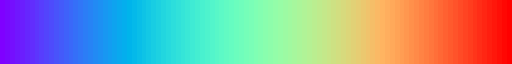

In [15]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

rainbow = cm.get_cmap('rainbow', df["UNIVERS"].value_counts().shape[0])
rainbow

In [ ]:
from sklearn.preprocessing import minmax_scale

min = 0
max = 1


df_color_map = df["UNIVERS"].unique().copy()
df_color_map = pd.DataFrame(data=df_color_map, columns=["UNIVERS"])
df_color_map["label"] = minmax_scale(df_color_map.index, feature_range=(min,max))
df_color_map

df_color_map_full = df.filter(["LIBELLE", "UNIVERS"]).groupby(["LIBELLE", "UNIVERS"]).count().reset_index()
df_color_map_full["label"] = list(map(lambda x: df_color_map[df_color_map["UNIVERS"] == x].iloc[0]['label'], df_color_map_full["UNIVERS"]))
df_color_map_full["colors"] = list(map(lambda x: rainbow(df_color_map_full[df_color_map_full["label"] == x].iloc[0]['label']), df_color_map_full["label"]))
df_color_dict_full = df_color_map_full.set_index(["LIBELLE"])
df_color_map


,UNIVERS,label
0,HYG_DOUCHE JARDINMONDE,0.000000
1,VIS_CJOUR Jeunes Specifique,0.009615
2,VIS_DEMAQ AAAR,0.019231
3,PARF_EAUX PARFUMS,0.028846
4,CORPS_LAIT HUILE PLAISIRNATURE,0.038462
...,...,...
100,HYG_DEO AUTRES,0.961538
101,VIS_DEMAQ Autres,0.971154
102,VIS_LOTIONS BIO,0.980769
103,MAQ_YEUX Autres,0.990385


In [ ]:
# result = np.empty((0, 2), str)
# ddf_test = pd.DataFrame(data=result, columns=['Src', 'Dst'])
idx = 0
d = dict()
for label_list in libelles_bought_together_list:
    l = list(combinations(label_list, 2))
    for tup in l:
        # print( df_color_map_full.iloc[tup[0], "LIBELLE"])
        # print("color: ", df_color_dict_full["colors"][tup[0]])
        # print("src: ", tup[0])
        # print("dest: ", tup[1])
        if str(tup[0] + "|" + tup[1]) in d:

            d[str(tup[0] + "|" + tup[1])]["size"] += 1
        elif str(tup[1] + "|" + tup[0]) in d:
            d[str(tup[1] + "|" + tup[0])]["size"] += 1

        else:
            d[str(tup[0] + "|" + tup[1])] = {"size": 1, "color": df_color_dict_full["colors"][tup[0]]}

        # break
    # ddf_test = pd.concat([ddf_test, a], ignore_index=True)
    # break
    if idx % 10000 == 0:
        print(str(idx) + " / " + str(len(libelles_bought_together_list)))
        # print(ddf_test.head())
    idx += 1
d
# ddf_test

0 / 25833
10000 / 25833
20000 / 25833


{'RAL CR HYD MAUV/ALCECN3 2009 3.7|VAO PARME 41 LUMINELLE4 3ML': {'size': 1,
  'color': (1.0, 0.6167188726285429, 0.3262027892208692, 1.0)},
 'RAL CR HYD MAUV/ALCECN3 2009 3.7|VAO FUCHSIA 13 LUMINELLE4 3ML': {'size': 2,
  'color': (1.0, 0.6167188726285429, 0.3262027892208692, 1.0)},
 'VAO PARME 41 LUMINELLE4 3ML|VAO FUCHSIA 13 LUMINELLE4 3ML': {'size': 8,
  'color': (0.3076923076923077, 0.297503053855203, 0.9886154122075342, 1.0)},
 'LAIT DEMAQ 2010 SV FL200ML|EYE LINER NOIR 81 LUM4 2,5ML': {'size': 2,
  'color': (0.46153846153846156,
   0.06037849742228606,
   0.9995437844895334,
   1.0)},
 'BAUME LEVRES VANILLE 4G|RIDES+FERMETE JOUR P50ml SV40': {'size': 3,
  'color': (0.13461538461538458, 0.5429489822014787, 0.9591052296873889, 1.0)},
 'BAUME LEVRES VANILLE 4G|NUTRI LAIT DEMAQ VELOUTE F200ML': {'size': 1,
  'color': (0.13461538461538458, 0.5429489822014787, 0.9591052296873889, 1.0)},
 'RIDES+FERMETE JOUR P50ml SV40|NUTRI LAIT DEMAQ VELOUTE F200ML': {'size': 1,
  'color': (0.05769230

In [ ]:
min_interraction = 100

test_total = list()
for key, val in d.items():
    if (val["size"] >= min_interraction):
        test_total.append((key.split("|")[1], key.split("|")[0], val["size"], val["color"], val["size"]))

all_network_df = pd.DataFrame(data=test_total, columns=['Src', 'Dst', "size", "color", "weight"])
all_network_df.shape

(11, 5)

In [ ]:
# all_network_df.groupby(['Src', 'Dst'])['Src'].transform('size')

# all_network_df['size'] = all_network_df.groupby(['Src', 'Dst'])['Src'].transform('size')
# # all_network_df['weight'] = all_network_df.groupby(['Src', 'Dst'])['Src'].transform('size')
# all_network_df

In [ ]:

G = nx.from_pandas_edgelist(all_network_df, 'Src', 'Dst',
                            create_using=nx.DiGraph(), edge_attr=['size', "color", "weight"])

In [ ]:
G.edges(data=True)

OutEdgeDataView([('REPACK CONTOUR YEUX RC2 P15ml', 'REPACK AR BIEN JOUR RC2 P 50ml', {'size': 128, 'color': (0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0), 'weight': 128}), ('CR FONDAMENTALE JOUR AAG 50ml', 'CREME NUIT AntiAge GLOBAL 50ml', {'size': 139, 'color': (0.903846153846154, 0.8054511325509458, 0.45129691370315345, 1.0), 'weight': 139}), ('REPACK AR BIEN NUIT RC2 P 50ml', 'REPACK AR BIEN JOUR RC2 P 50ml', {'size': 206, 'color': (0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0), 'weight': 206}), ('LOTION SV 2010 FL200ML', 'LAIT DEMAQ 2010 SV FL200ML', {'size': 139, 'color': (0.46153846153846156, 0.06037849742228606, 0.9995437844895334, 1.0), 'weight': 139}), ('MSQ CRANBERRY BTE CROQUER T50', 'GOMM ABRICOT  BTE CROQUER T50', {'size': 103, 'color': (0.15384615384615385, 0.5173378141776568, 0.9632708010475163, 1.0), 'weight': 103}), ('LAIT DEM BIO.SPE.AC.SENS.150ML', 'LTN DERM/AP BIO.SPE.AC.SENS.150ML', {'size': 144, 'color': (0.5192307692307694

In [ ]:
G.nodes

NodeView(('REPACK CONTOUR YEUX RC2 P15ml', 'REPACK AR BIEN JOUR RC2 P 50ml', 'CR FONDAMENTALE JOUR AAG 50ml', 'CREME NUIT AntiAge GLOBAL 50ml', 'REPACK AR BIEN NUIT RC2 P 50ml', 'LOTION SV 2010 FL200ML', 'LAIT DEMAQ 2010 SV FL200ML', 'MSQ CRANBERRY BTE CROQUER T50', 'GOMM ABRICOT  BTE CROQUER T50', 'LAIT DEM BIO.SPE.AC.SENS.150ML', 'LTN DERM/AP BIO.SPE.AC.SENS.150ML', 'GD JDM4 LOTUS FL200ML', 'GD JDM4 GRENADE FL200ML', 'GD JDM4 LAVANDIN DE PROVENCE 200ML', 'GD JDM4 CIT VERT FL 200ML', 'GM 200ml FRUITS ROUGES', 'GM FRUITS NOIRS 200 ML'))

In [ ]:
d = dict(G.degree(weight='size'))
d

{'REPACK CONTOUR YEUX RC2 P15ml': 128,
 'REPACK AR BIEN JOUR RC2 P 50ml': 334,
 'CR FONDAMENTALE JOUR AAG 50ml': 139,
 'CREME NUIT AntiAge GLOBAL 50ml': 139,
 'REPACK AR BIEN NUIT RC2 P 50ml': 206,
 'LOTION SV 2010 FL200ML': 139,
 'LAIT DEMAQ 2010 SV FL200ML': 139,
 'MSQ CRANBERRY BTE CROQUER T50': 103,
 'GOMM ABRICOT  BTE CROQUER T50': 103,
 'LAIT DEM BIO.SPE.AC.SENS.150ML': 144,
 'LTN DERM/AP BIO.SPE.AC.SENS.150ML': 144,
 'GD JDM4 LOTUS FL200ML': 286,
 'GD JDM4 GRENADE FL200ML': 236,
 'GD JDM4 LAVANDIN DE PROVENCE 200ML': 370,
 'GD JDM4 CIT VERT FL 200ML': 102,
 'GM 200ml FRUITS ROUGES': 118,
 'GM FRUITS NOIRS 200 ML': 118}

In [ ]:
node_colors = list(map(lambda x: df_color_dict_full["colors"][x], d.keys()))
node_colors

[(0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0),
 (0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0),
 (0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0),
 (0.903846153846154, 0.8054511325509458, 0.45129691370315345, 1.0),
 (0.903846153846154, 0.8054511325509458, 0.45129691370315345, 1.0),
 (0.7115384615384617, 0.9452998150346402, 0.5804296730781131, 1.0),
 (0.46153846153846156, 0.06037849742228606, 0.9995437844895334, 1.0),
 (0.15384615384615385, 0.5173378141776568, 0.9632708010475163, 1.0),
 (0.15384615384615385, 0.5173378141776568, 0.9632708010475163, 1.0),
 (0.03846153846153855, 0.7485107481711012, 0.9118998459920901, 1.0),
 (0.5192307692307694, 0.9995437844895334, 0.6963465273120528, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.653846153846154, 0.970941817426052, 0.616718872628543, 1.0),
 (0.653846153846154, 0.970941817426052, 0.616718872628543, 1.0)]

In [ ]:
node_sizes_raw = list([v for v in d.values()])
node_sizes_raw

[128,
 334,
 139,
 139,
 206,
 139,
 139,
 103,
 103,
 144,
 144,
 286,
 236,
 370,
 102,
 118,
 118]

In [ ]:
min = 40
max = 3000

X = minmax_scale(node_sizes_raw, feature_range=(min,max))

node_sizes = X
node_sizes

array([ 327.1641791 , 2602.3880597 ,  448.65671642,  448.65671642,
       1188.65671642,  448.65671642,  448.65671642,   51.04477612,
         51.04477612,  503.88059701,  503.88059701, 2072.23880597,
       1520.        , 3000.        ,   40.        ,  216.71641791,
        216.71641791])

In [ ]:
widths = [G[u][v]['size'] for u,v in G.edges]
widths

[128, 139, 206, 139, 103, 144, 127, 159, 109, 102, 118]

In [ ]:
min = 0.2
max = 6
X = minmax_scale(widths, feature_range=(min,max))

edge_widths = X
edge_widths

array([1.65      , 2.26346154, 6.        , 2.26346154, 0.25576923,
       2.54230769, 1.59423077, 3.37884615, 0.59038462, 0.2       ,
       1.09230769])

In [ ]:
edge_colors = [G[u][v]['color'] for u,v in G.edges]
edge_colors

[(0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0),
 (0.903846153846154, 0.8054511325509458, 0.45129691370315345, 1.0),
 (0.05769230769230771, 0.7681975780402805, 0.9055972726500693, 1.0),
 (0.46153846153846156, 0.06037849742228606, 0.9995437844895334, 1.0),
 (0.15384615384615385, 0.5173378141776568, 0.9632708010475163, 1.0),
 (0.5192307692307694, 0.9995437844895334, 0.6963465273120528, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.5, 0.0, 1.0, 1.0),
 (0.653846153846154, 0.970941817426052, 0.616718872628543, 1.0)]

In [ ]:
color_dict = df_color_map.set_index(["label"]).to_dict()
labels = [key for key, val in color_dict["UNIVERS"].items()]
univers = [val for key, val in color_dict["UNIVERS"].items()]

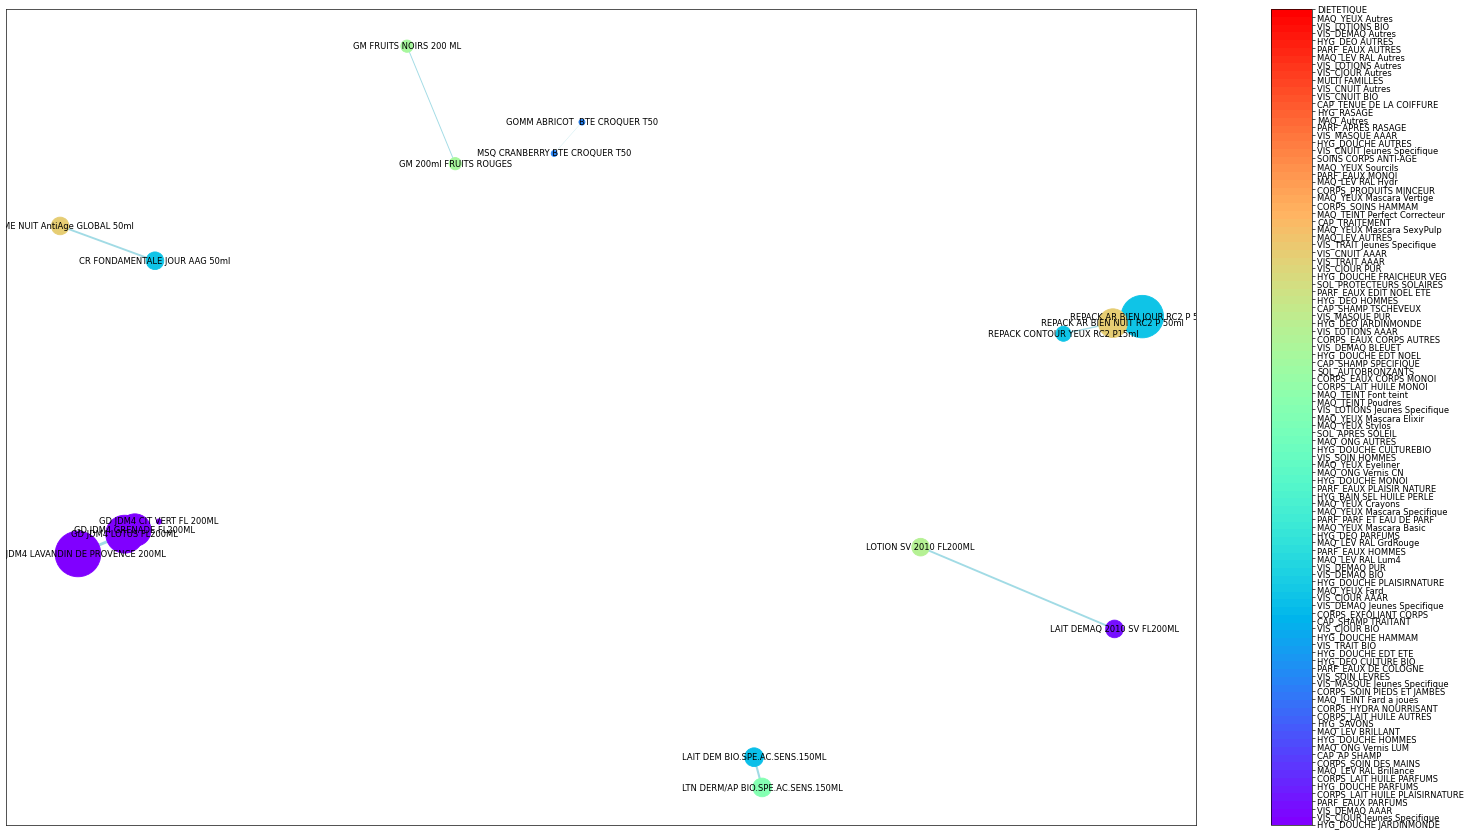

In [ ]:
# G=nx.from_pandas_edgelist(df_total, 'Src', 'Dst')
pos = nx.spring_layout(G, seed=42)
fig = plt.figure(1, figsize=(32, 18), dpi=60)
mtl = nx.draw_networkx(G,
                ax=fig.add_subplot(111),
                pos=pos,
                arrows=False,
                width=edge_widths,
                with_labels=True, 
                font_weight='normal',
                node_color=node_colors,
                # node_color='#00b7af',
                edge_color="#a1dbe5",
                font_color="black",
                font_size=10,
                nodelist=list(d.keys()),
                node_size=node_sizes)
sm = plt.cm.ScalarMappable(cmap=rainbow, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm)
cbar.set_ticks(labels)
cbar.set_ticklabels(univers)


# plt.show(block=False)
plt.savefig("Graph_" + str(all_network_df.shape[0]) + ".png", format="PNG")
